#Probability Threshold Analysis

In [1]:
%matplotlib inline
from pprint import pprint
from collections import defaultdict

import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
import pickle

import sklearn
import sklearn.linear_model
from sklearn.linear_model import LogisticRegression
import sklearn.tree
import sklearn.ensemble

from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB
#from sklearn.linear_model import SGDClassifier

import sys
sys.path.append('../dev')
from ml_plot import get_dataset
from ml_plot import getClassifierProbs
from ml_plot import plotThresholdDistribuition, plotPredictionStats
from ml_plot import plotCombinedResults

# Configuration

In [2]:
PROJECT = 'nova'
# PROJECT = 'swift'
# PROJECT = 'cinder'
# PROJECT = 'heat'
# PROJECT = 'glance'

# IMPORTANCE = 'crit'
# IMPORTANCE = 'high+'
IMPORTANCE = 'med+'
# IMPORTANCE = 'low+'

VERBOSE = 0

warnings.filterwarnings("ignore", 'F-score is ill-defined')

#Code

# Load Data

In [3]:
all_results = {}

In [4]:
%%capture
Y, X = get_dataset(PROJECT, IMPORTANCE)

#Logistic Regression

In [5]:
clf = LogisticRegression(C=1.0, class_weight='auto', dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0)

In [6]:
results = getClassifierProbs(clf, X, Y, history=2000, future=500, n_iter=10)

* * * * * * * * * *


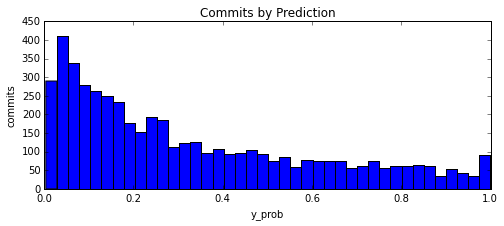

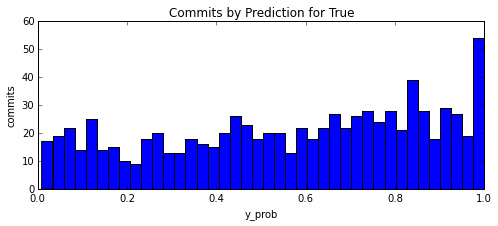

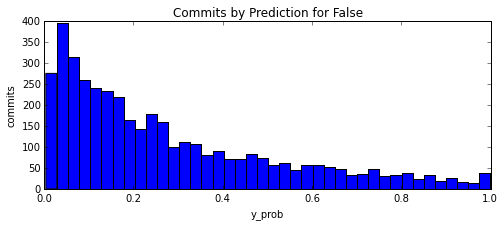

In [7]:
plotThresholdDistribuition(results)

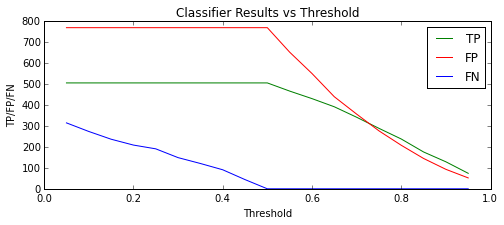

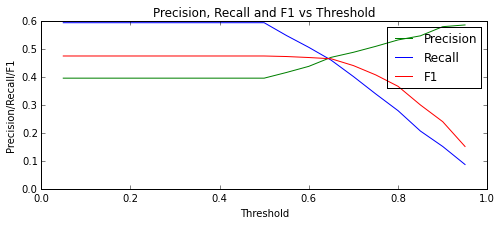

In [8]:
plotPredictionStats(results)

In [9]:
all_results['LR'] = results

#SVC

In [10]:
clf = SVC(C=7.7426368268112693, cache_size=200, class_weight='auto', coef0=0.0,
  degree=3, gamma=0.0042813323987193957, kernel='rbf', max_iter=-1,
  probability=True, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

In [11]:
results = getClassifierProbs(clf, X, Y, history=2000, future=500, n_iter=10)

* * * * * * * * * *


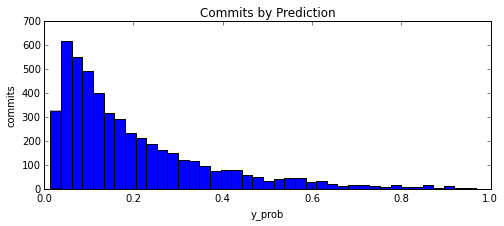

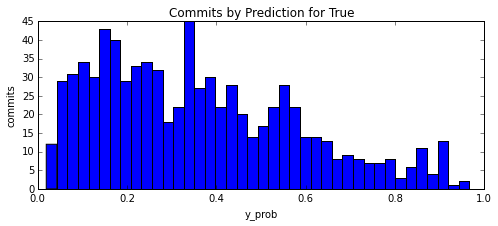

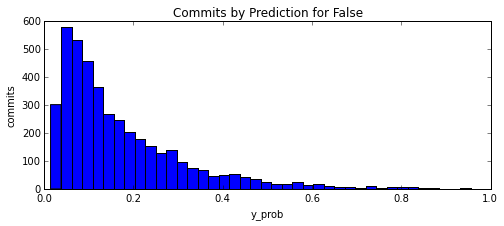

In [12]:
plotThresholdDistribuition(results)

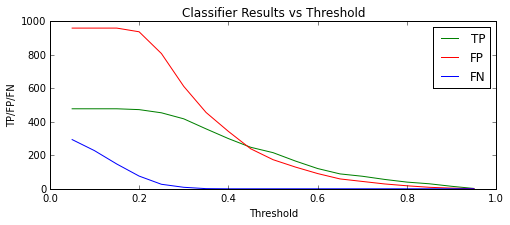

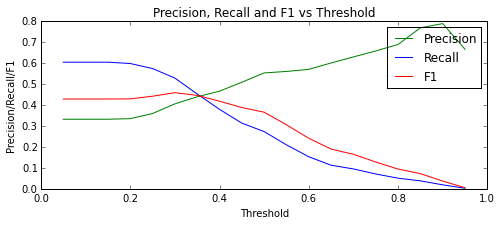

In [13]:
plotPredictionStats(results)

In [14]:
all_results['svc'] = results

#SGD

Note:  Probability Estimates not available for loss='hinge'

In [15]:
clf = sklearn.linear_model.SGDClassifier(alpha=0.01, average=False, class_weight='auto', epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', n_iter=400,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, verbose=0, warm_start=False)

In [16]:
results = getClassifierProbs(clf, X, Y, history=2000, future=500, n_iter=10)

* * * * * * * * * *


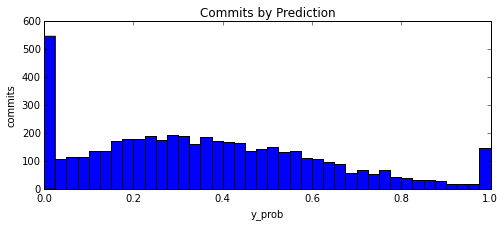

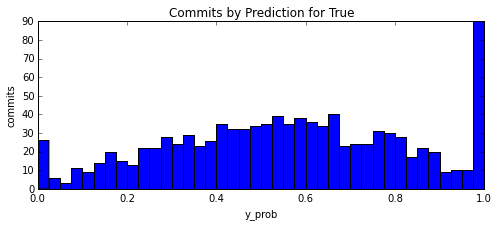

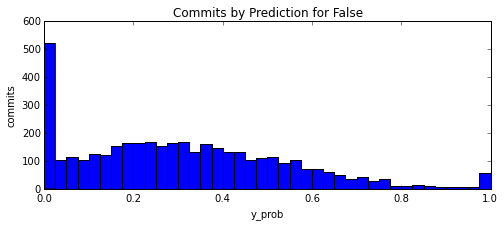

In [17]:
plotThresholdDistribuition(results)

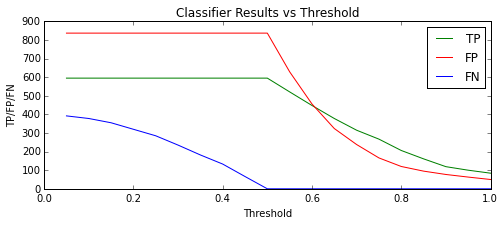

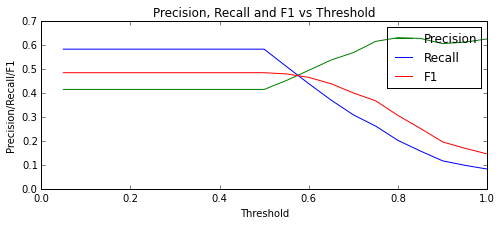

In [18]:
plotPredictionStats(results)

In [19]:
all_results['sgd'] = results

#AdaBoostClassifier

In [20]:
clf = sklearn.ensemble.AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
          n_estimators=25, random_state=None)

In [21]:
results = getClassifierProbs(clf, X, Y, history=2000, future=500, n_iter=10)

* * * * * * * * * *


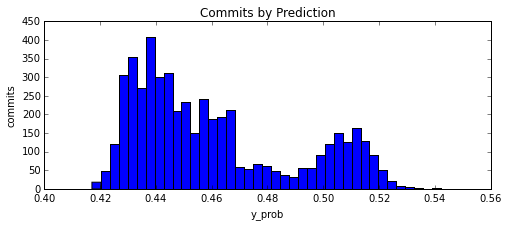

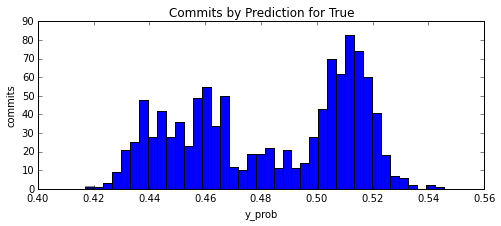

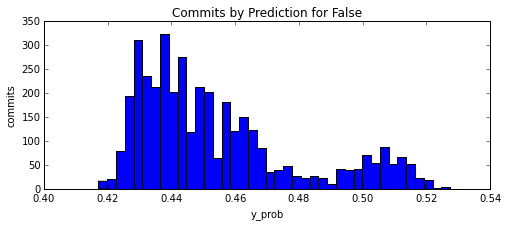

In [22]:
plotThresholdDistribuition(results)

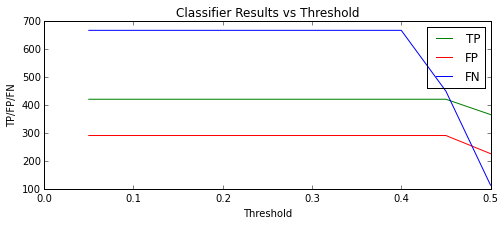

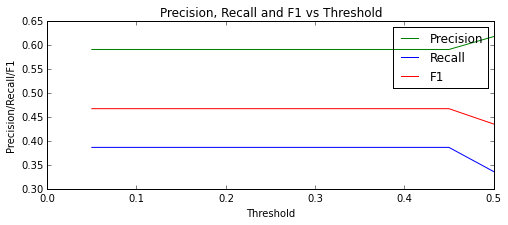

In [23]:
plotPredictionStats(results)

In [24]:
all_results['adaboost'] = results

#TBD

#TBD

#Save all Results

In [25]:
if True:
    with open('all_probability_results.pkl', 'wb') as output:
        pickle.dump(all_results, output)
        print 'Done'

Done


#Plot Combined Results

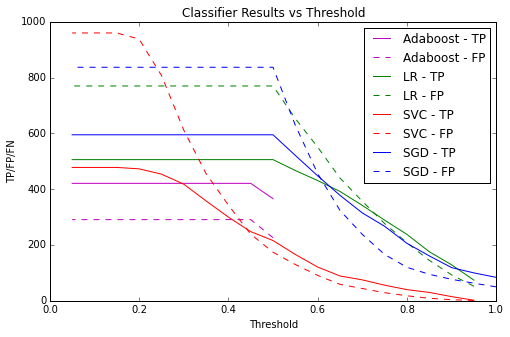

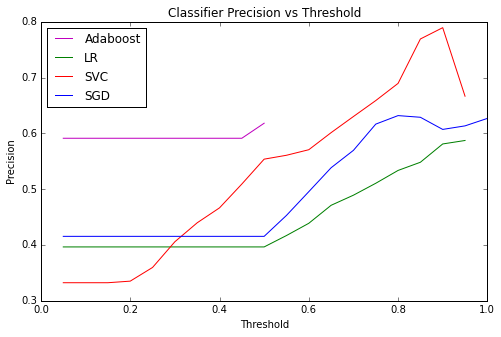

In [26]:
plotCombinedResults(all_results)